# Compute the trend of a time series 

Let's perform a linear regression on time series data by exploiting *PyOphidia*, *numpy* and *matplotlib* for the visualization. The goal is to extract the trend of the time series.

1- First of all import the PyOphidia modules and connect to the server-side

In [11]:
from PyOphidia import cube
cube.Cube.setclient(read_env=True)

Current cdd is /home/ecasuser
Current session is https://ophidialab.cmcc.it/ophidia/sessions/28428206836738622831574257875438385/experiment
Current cwd is /
The last produced cube is https://ophidialab.cmcc.it/ophidia/6256/850343


2- Load the *tasmin* variable from the input dataset located at */public/data/ecas_training/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc*. The data is imported so that it is time-array oriented.

In [12]:
mintemp = cube.Cube.importnc(
    src_path='/public/data/ecas_training/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc',
    measure='tasmin',
    import_metadata='yes',
    imp_dim='time',
    imp_concept_level='d', vocabulary='CF',hierarchy='oph_base|oph_base|oph_time',
    ncores=2,
    description='Min Temps')

3- Extract a single time series from the imported cube *(just consider the first index for latitute and longitude)* and print its content

In [13]:
singleTS = mintemp.subset(
    subset_dims="lat|lon",
    subset_filter="1|1",
    subset_type='index',
    ncores=2)

singleTS.explore()

tasmin
------
+============+==========+==============================================================================================+
| lat        | lon      | tasmin                                                                                       |
+============+==========+==============================================================================================+
| -87.159095 | 0.000000 | 255.3484649658, 256.5523071289, 257.9611206055, 258.1882934570, 258.6824951172, 258.75317382 |
|            |          | 81, 259.7331542969, 259.6237487793, 257.0916748047, 255.5845642090, 256.6911926270, 257.7592 |
|            |          | 773438, 256.3059692383, 255.1929779053, 254.8903198242, 254.4397430420, 254.0504760742, 255. |
|            |          | 5076904297, 257.9510498047, 256.1823730469, 255.6322479248, 255.7233581543, 254.8574829102,  |
|            |          | 253.6629943848, 252.9137115479, 251.5997924805, 251.6222076416, 251.5493774414, 250.30424499 |
|            |    

4- Run the Ophidia primitive to perform the linear regression over the time series.
The *apply* operator with the *oph_gsl_fit_linear* primitive can be used.

**NOTE:** the resulting cube will just provide two values, the intercept and the slope.

In [14]:
trendCube = singleTS.apply(
    query="oph_gsl_fit_linear_coeff('OPH_FLOAT','OPH_FLOAT',measure, dimension,'110000')",
    check_type='no')

5- Let's plot the data with respect to the time dimensions (indexes), as well as the linear regression line in a scatter plot. Note that:

```python
trendCoeff = trendCube.export_array(show_time='no')
intercept = trendCoeff['measure'][0]['values'][0][0]
slope = trendCoeff['measure'][0]['values'][0][1]
```

('C:\\Users\\user\\Anaconda3\\lib\\site-packages\\PyOphidia\\cube.py', 4964) Unable to get dimensions from response: unpack requires a buffer of 4 bytes


TypeError: 'NoneType' object is not subscriptable

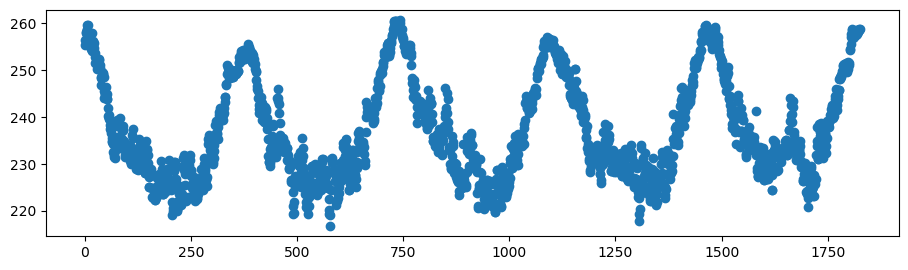

In [15]:
%matplotlib inline

data = singleTS.export_array(show_time='no')
trendCoeff = trendCube.export_array(show_time='no')

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np

y = data['measure'][0]['values'][0][:]
x = data['dimension'][2]['values'][:]
fig, ax = plt.subplots(figsize=(11, 3), dpi=100)
ax.scatter(x, y)

intercept = trendCoeff['measure'][0]['values'][0][0]
slope = trendCoeff['measure'][0]['values'][0][1]

line = intercept + slope * np.array(x)
ax.plot(x,line, color='red')

plt.ylabel(data['measure'][0]['name'] + " (degK)")
plt.xlabel("Days since 2096/01/01")
plt.title('Minimum temperature')
plt.show()


Finally clear your workspace from the datacubes produced during the experiments.

In [ ]:
cube.Cube.deletecontainer(container='tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc',force='yes')